In [400]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
import pickle

### Save the DF to variable `df`

In [354]:
df = pd.read_csv("../../diamond_data/train.csv")

In [355]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


### Check for mising values

In [356]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


### Drop the `id` column

In [358]:
df.drop(['id'], axis=1, inplace=True)

In [359]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.50,Ideal,D,VS2,62.3,55.0,5.11,5.07,3.17,1845
1,1.54,Good,I,VS1,63.6,60.0,7.30,7.33,4.65,10164
2,1.32,Very Good,J,SI2,61.7,60.0,6.95,7.01,4.31,5513
3,1.20,Ideal,I,SI1,62.1,55.0,6.83,6.79,4.23,5174
4,1.73,Premium,I,SI1,61.2,60.0,7.67,7.65,4.69,10957


### Check out some summary statistics

In [360]:
# summary_df = pd.concat([df.describe(), df.mode().set_axis(['mode'])])
describe = df.describe()
mode = df.mode().set_axis(['mode'])
summary_df = pd.concat([mode, describe])

In [361]:
summary_df

,carat,cut,color,clarity,depth,table,x,y,z,price
mode,0.300000,Ideal,G,SI1,62.000000,56.000000,4.370000,4.340000,2.700000,605.000000
count,40455.000000,NaN,NaN,NaN,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.800571,NaN,NaN,NaN,61.749675,57.462820,5.737267,5.741070,3.541966,3956.020517
std,0.475258,NaN,NaN,NaN,1.433896,2.243808,1.123680,1.153677,0.696327,4009.646467
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.720000,4.730000,2.910000,954.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000,2428.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.040000,5362.500000
max,5.010000,NaN,NaN,NaN,79.000000,95.000000,10.740000,58.900000,8.060000,18818.000000


#### We want to separate our values

**Categorical:** cut, clarity, color

**Continuous:** carat, depth, table, x, y, z

----------------
**We see here that there are a few overpriced Diamonds**
<br>We also see that Carat has a *mode* 0.3, an *average* of 0.8 and a *median* of 0.7 which means the highest concentration of diamonds is down near the tip of that funnel.
<br>Also the mode cut is Ideal, color rating G, and Clarity SI1. This means that a lot of small lower to medium grade diamonds are improved quite a bit by high quality cuts, possibly.

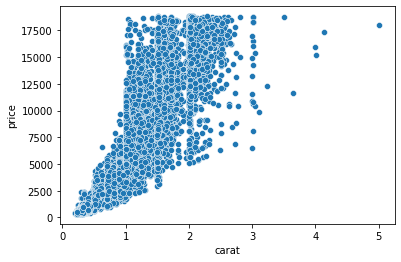

In [362]:
sns.scatterplot(data=df, x="carat", y="price")
plt.show()

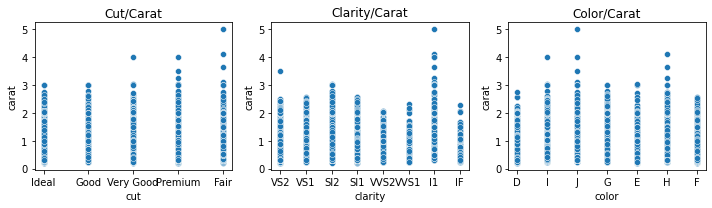

In [363]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
sns.scatterplot(data=df, x='cut', y= 'carat', ax=ax1)
ax1.set_title('Cut/Carat')
sns.scatterplot(data=df, x='clarity', y= 'carat', ax=ax2)
ax2.set_title('Clarity/Carat')
sns.scatterplot(data=df, x='color', y= 'carat', ax=ax3)
ax3.set_title('Color/Carat')
plt.tight_layout()

This shows us that the larger diamonds fall in the category of **Fair** cut, **IL** clarity, and **H-I** color.
<br>These are not good quality diamonds.

---------

In [364]:
def histplot(df, listvar):
    fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20,3))
    for count, ax in enumerate(axes):
        sns.histplot(data=df,x=listvar[count], bins=20, ax=axes[count])
        plt.ylabel('price')
        plt.xlabel(listvar[count])
        plt.xlim([df[listvar[count]].min(),df[listvar[count]].max()])
        plt.tight_layout()
    plt.show()

In [365]:
linear_vars = df.select_dtypes(include=[np.number]).columns
list(linear_vars)

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

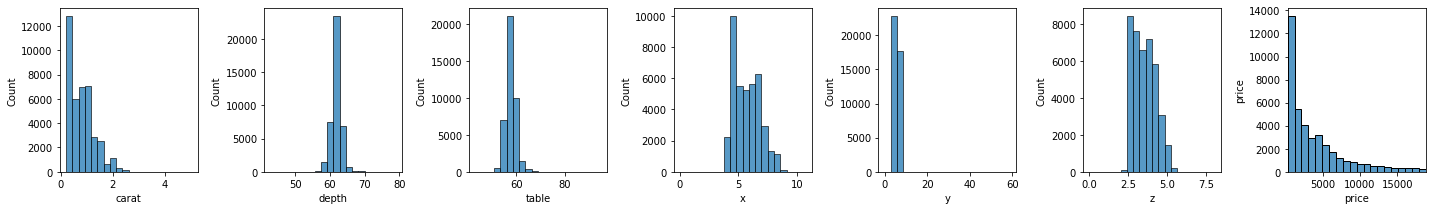

In [366]:
histplot(df, linear_vars)


**We see there are no normal distributions here.**

-----------

## !!! Check continuous values for zeros before LogTransform
<br> If we do a log transformation, we must check that there are no zeros in our continuous values or log will throw an error. 
<br> Change zeros to almost zero, like 0.001

In [367]:
print('0 values ->', 0 in df.values)
df[linear_vars] = df[linear_vars] + 0.01
print('Filled 0 with 0.01. Now 0 values ->', 0 in df.values)

0 values -> True
Filled 0 with 0.01. Now 0 values -> False


#### We need to take care of the outliers

In [368]:
def boxplots(df, listvars):
    fig,axes = plt.subplots(nrows=1, ncols=len(listvars), figsize=(10,5))
    for count, ax in enumerate(listvars):
        sns.boxplot(data=df, y=listvars[count], ax=axes[count])
        plt.ylabel('Price')
        plt.xlabel(listvars[count])
        plt.tight_layout()
    plt.show()

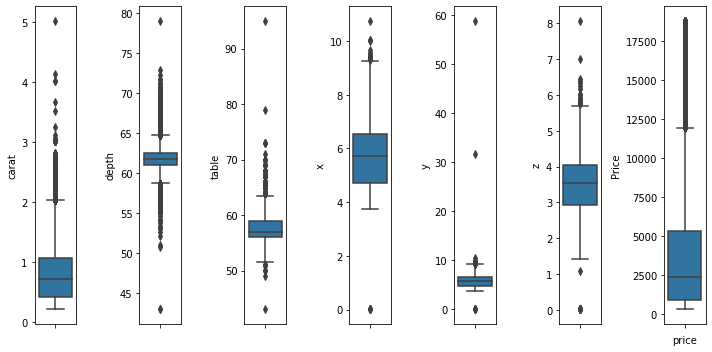

In [369]:
boxplots(df,linear_vars)

The standard score (z-score) is the number of standard deviations by which the value of a raw score is above or below the mean value of what is being observed or measured. Raw scores above the mean have positive standard scores, while those below the mean have negative standard scores.

So we are going to find all the values within a z score of 2. Which means that they are neither above or below the location of the central tendency by more 2 standard deviations. This is also the way to find "statistically significant" values.

In [370]:
def removeoutliers(df,listvars, zmax):
    from scipy import stats
    for var in listvars:
        # This line starts with df[var]
        # Take the zscore of of df[var]
        # The absolute value of the z score 
        # and finally if that is less than the zmax
        df1 = df[np.abs(stats.zscore(df[var])) < zmax]
    return df1

Let's stop to observe the changes between the before and afer of our boxplots.
<br> We see the max values for carat has reduced from 10 to 3.5. - *significant change*
<br> Depth has stayed the same. - *no change*
<br> Table has reduced from 90 to 80. - *small change*
<br> x-dimension drops a value above 10 - *small change*
<br> y-dimension drops a value out in 60 to reduce to 30 - *significant change*
<br> z-dimension drops from 8 to 6 - *significant change*
<br> and price reduces from almost 20,000 to a more reasonable 12,000 - *significant change*

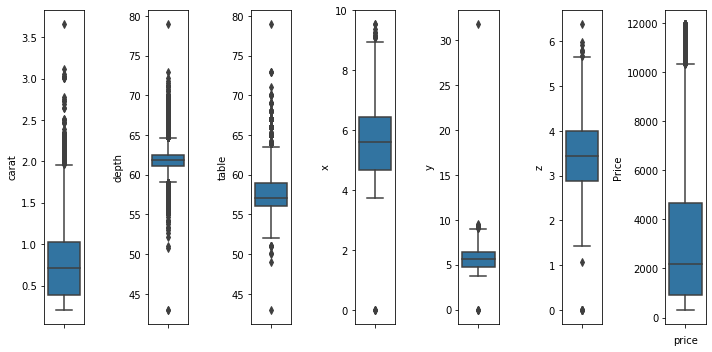

In [371]:
df = removeoutliers(df, linear_vars, 2)
boxplots(df,linear_vars)

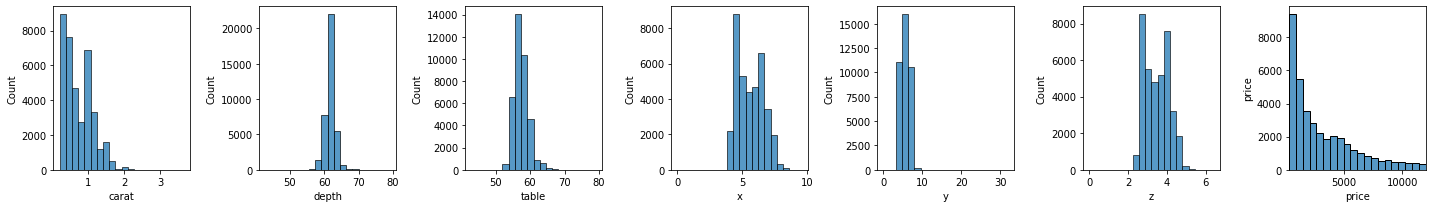

In [372]:
histplot(df, linear_vars)

We can do a before and after comparison

In [373]:
# This is inplace
def convertfeatures2log(df, listvars):
    for var in listvars:
        df[var] = np.log(df[var])

In [374]:
convertfeatures2log(df, linear_vars)

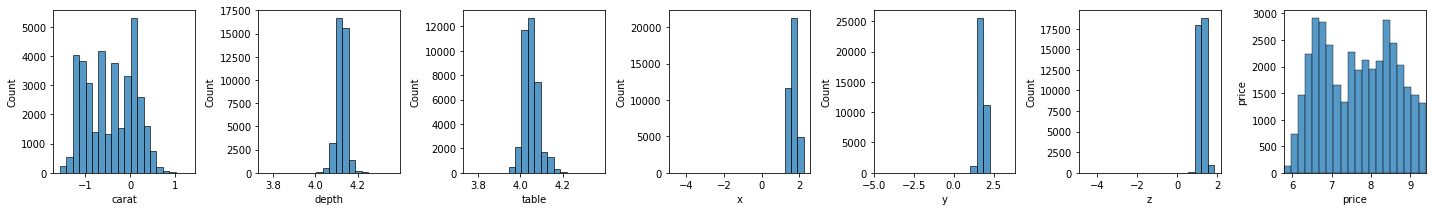

In [375]:
histplot(df, linear_vars)

**Now we see that carat and price look more bimodally distributed**

(4.0, 4.25)

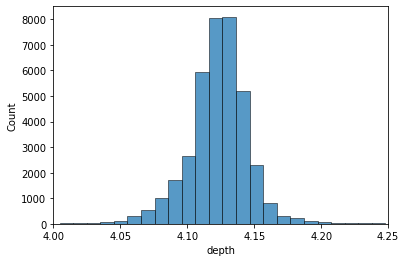

In [339]:
sns.histplot(x=df['depth'], bins=60)
plt.xlim([4,4.25])

(1.25, 2.25)

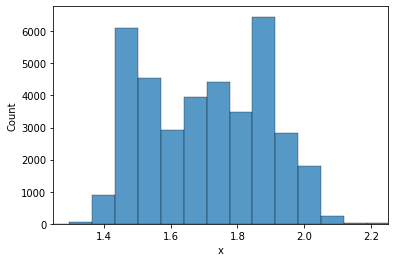

In [345]:
sns.histplot(x=df['x'], bins=100)
plt.xlim([1.25,2.25])

---------------
### We Convert the Categorical data into Numerical Data using `LabelEncoder()`

In [380]:
def convert_cats(df):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    
    ### Select categorical features by excluding the np.numbers dtypes from the list of categories
    cats = list(df.select_dtypes(exclude=(np.number)).columns)
    
    # cats_index will be populated by the indices of each column based on their name
    cats_index = [df.columns.get_loc(col) for col in cats]
    
    # Use the real indices to reference the columns to transform
    for i in cats_index:
        df.iloc[:,i] = le.fit_transform(df.iloc[:,i])

In [381]:
convert_cats(df)
df.head()

['cut', 'color', 'clarity']


,carat,cut,color,clarity,depth,table,x,y,z,price
0,-0.673345,2,0,5,4.132122,4.007515,1.633154,1.625311,1.156881,7.520240
1,0.438255,1,5,4,4.152771,4.094511,1.989243,1.993339,1.539015,9.226608
2,0.285179,4,6,3,4.122446,4.094511,1.940179,1.948763,1.463255,8.614866
3,0.190620,2,5,2,4.128907,4.007515,1.922788,1.916923,1.444563,8.551403
4,0.553885,3,5,2,4.114311,4.094511,2.038620,2.036012,1.547563,9.301735


-----
### Lets see the correlations

In [393]:
df_dropped = df.drop(['x','y','z'], axis=1)

In [396]:
df_dropped.corr()

,carat,cut,color,clarity,depth,table,price
carat,1.000000,0.002933,0.239010,-0.247358,0.041383,0.192649,0.960956
cut,0.002933,1.000000,-0.003963,0.030511,-0.183334,0.149697,0.015928
color,0.239010,-0.003963,1.000000,-0.021672,0.056377,0.018424,0.128462
clarity,-0.247358,0.030511,-0.021672,1.000000,-0.057538,-0.088676,-0.123386
depth,0.041383,-0.183334,0.056377,-0.057538,1.000000,-0.297331,0.009182
table,0.192649,0.149697,0.018424,-0.088676,-0.297331,1.000000,0.157365
price,0.960956,0.015928,0.128462,-0.123386,0.009182,0.157365,1.000000


<AxesSubplot:>

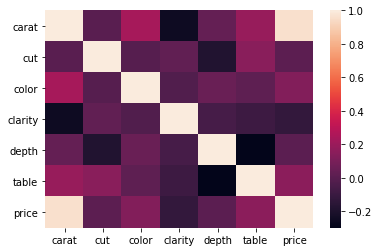

In [397]:
sns.heatmap(df_dropped.corr())

It seems clear that diamond price is highly correlated with carat.... and color and table slightly correlate.

--------
### Pickle data here

In [426]:
filename = '../../pickled_data/df_to_open_in_note_2'
outfile = open(filename, "wb")
pickle.dump(df, outfile)
outfile.close()

End of transmission
---------------------
Go to next notebook [here]('2_Various_ML_TrainTest_Prediction_Models.ipynb')

----------

----------
### We separate target `y` from features `X`

In [391]:
X = df.iloc[:,:-4]
y = df.iloc[:,-1]

The `train_test_split` is set to split on 0.7 for train and 0.3 for test and the random state gives us concrete number to reference a random selection of rows so we get the same set of random each time we run the function. Apparently, `42` is just a reference to **Hitchikers's Guided to the Galaxy**. I should read it some day.

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Get Dummies

In [10]:
df['cut'].value_counts()

Ideal        16152
Premium      10321
Very Good     9040
Good          3729
Fair          1213
Name: cut, dtype: int64

In [12]:
pd.get_dummies(df['cut'])

,Fair,Good,Ideal,Premium,Very Good
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
40450,0,0,0,0,1
40451,0,0,0,1,0
40452,0,0,1,0,0
40453,0,1,0,0,0


#### Cut grading

Diamonds are graded into the following cuts:

- Ideal cut
- Premium cut
- Very Good (or Fine) cut
- Good cut
- Fair cut
- Poor cut



In [13]:
pd.get_dummies(df['color'])

,D,E,F,G,H,I,J
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
40450,0,0,1,0,0,0,0
40451,0,0,0,0,1,0,0
40452,0,0,1,0,0,0,0
40453,0,0,0,0,1,0,0


**Colorless Diamonds**
<br>D - perfectly colorless. The D color diamond is the ultimate color grade in the normal range and appears icy white.
<br>E – colorless. Only when compared to a D color in a clinical environment does a very slight body color become vaguely noticeable in an E color diamond.
<br>F - colorless. An F color diamond will look icy white and not show any apparent color from any viewing angle, except when compared to master diamonds by a trained grader.

**<br>Near Colorless Diamonds**
<br>G – top of the near colorless range. The G color diamond is virtually indistinguishable from colorless in real world situations.
<br>H - solidly near colorless. An H color diamond looks white, even when viewed from the side and even in larger sizes.
<br>I – solidly near colorless. The I color diamond looks white enough to be set in white gold or platinum without creating any significant contrast.
<br>J – near colorless. The J color diamond “faces up” white, particularly if it has optimal light performance.
<br>K – faint. The K color diamond, if cut with precision, returns an abundance of ambient light with a faint warm glow.


In [14]:
pd.get_dummies(df['clarity'])

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
40450,0,0,1,0,0,0,0,0
40451,0,0,1,0,0,0,0,0
40452,0,0,0,0,0,1,0,0
40453,0,0,0,0,0,1,0,0


**Clarity ratings**
<br>FL/ IF (Flawless / Internally Flawless)
<br>VVS1 (Very Very Slightly Included – 1st Degree)
<br>VVS2 (Very Very Slightly Included – 2nd Degree)
<br>VS1 (Very Slightly Included – 1st Degree)
<br>VS2 (Very Slightly Included – 2nd Degree)
<br>SI1 (Slightly Included – 1st Degree)
<br>SI2 (Slightly Included – 2nd Degree)
<br>I1 (Included – 1st Degree)

In [49]:
enc = OrdinalEncoder()

In [52]:
enc_df = enc.fit_transform(df)

In [54]:
enc_df

array([[3.000e+01, 2.000e+00, 0.000e+00, ..., 1.320e+02, 9.700e+01,
        1.392e+03],
       [1.340e+02, 1.000e+00, 5.000e+00, ..., 3.580e+02, 2.450e+02,
        7.622e+03],
       [1.120e+02, 4.000e+00, 6.000e+00, ..., 3.260e+02, 2.110e+02,
        4.723e+03],
       ...,
       [4.300e+01, 2.000e+00, 2.000e+00, ..., 1.760e+02, 1.190e+02,
        1.719e+03],
       [1.020e+02, 1.000e+00, 4.000e+00, ..., 2.960e+02, 2.100e+02,
        5.973e+03],
       [1.200e+01, 3.000e+00, 0.000e+00, ..., 6.700e+01, 4.700e+01,
        6.230e+02]])